Módulo: Machine Learning<br>
Professor: Helder Vieira<br>
Data: 12/2021

# Aula 03 - RandomForest - Exercício

## Exercício 1

Utilizando o dataset breast_cancer_train.csv, desenvolva um modelo RandomForest (utilizando o sklearn) com o objetivo de prever se o resultado de uma biópsia indica a presença de câncer malígno. Procure fazer com que o seu o modelo não apresente **overfitting** e maximize a acurácia.

Ao final, reporte:

1 - A acurácia, precisão e recall do seu modelo na base utilizada para treino e validação    
2 - A acurácia, precisão e recall do seu modelo na base breast_cancer_test.csv  
3 - Os parâmetros do modelo   
4 - Imagine que o hospital queira diminuir custos no ano seguinte e pretende deixar de colher algumas das variáveis. Quais variáveis você recomendaria a exclusão? Justifique.

### Carregando e visualizando os dados

In [1]:
import pandas as pd

In [2]:
df_breast_cancer_train = pd.read_csv('breast_cancer_train.csv')
print(df_breast_cancer_train.shape)
display(df_breast_cancer_train.head())

(455, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,857156,B,13.49,22.30,86.91,561.0,0.08752,0.07698,0.047510,0.033840,...,15.15,31.82,99.00,698.8,0.11620,0.17110,0.22820,0.12820,0.2871,0.06917
1,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,15.49,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
2,88330202,M,17.46,39.28,113.40,920.6,0.09812,0.12980,0.141700,0.088110,...,22.51,44.87,141.20,1408.0,0.13650,0.37350,0.32410,0.20660,0.2853,0.08496
3,88203002,B,11.22,33.81,70.79,386.8,0.07780,0.03574,0.004967,0.006434,...,12.36,41.78,78.44,470.9,0.09994,0.06885,0.02318,0.03002,0.2911,0.07307
4,892189,M,11.76,18.14,75.00,431.1,0.09968,0.05914,0.026850,0.035150,...,13.36,23.39,85.10,553.6,0.11370,0.07974,0.06120,0.07160,0.1978,0.06915


In [3]:
# Tratando a target: string para int
df_breast_cancer_train['diagnosis'] = df_breast_cancer_train['diagnosis'].map({'B':0, 'M':1})
df_breast_cancer_train.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,857156,0,13.49,22.30,86.91,561.0,0.08752,0.07698,0.04751,0.03384,...,15.15,31.82,99.0,698.8,0.1162,0.1711,0.2282,0.1282,0.2871,0.06917
1,844981,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.2,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
2,88330202,1,17.46,39.28,113.40,920.6,0.09812,0.12980,0.14170,0.08811,...,22.51,44.87,141.2,1408.0,0.1365,0.3735,0.3241,0.2066,0.2853,0.08496


In [4]:
df_breast_cancer_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       455 non-null    int64  
 1   diagnosis                455 non-null    int64  
 2   radius_mean              455 non-null    float64
 3   texture_mean             455 non-null    float64
 4   perimeter_mean           455 non-null    float64
 5   area_mean                455 non-null    float64
 6   smoothness_mean          455 non-null    float64
 7   compactness_mean         455 non-null    float64
 8   concavity_mean           455 non-null    float64
 9   concave points_mean      455 non-null    float64
 10  symmetry_mean            455 non-null    float64
 11  fractal_dimension_mean   455 non-null    float64
 12  radius_se                455 non-null    float64
 13  texture_se               455 non-null    float64
 14  perimeter_se             4

In [5]:
# Separando features e target X e y
X = df_breast_cancer_train.drop(['id','diagnosis'], axis=1)
y = df_breast_cancer_train['diagnosis']
print(X.shape,y.shape)

(455, 30) (455,)


In [6]:
# Sparando treino e validação
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=12)

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(318, 30) (318,)
(137, 30) (137,)


In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
model_1 = RandomForestClassifier(n_estimators=150, max_depth=2, random_state=12)

In [9]:
model_1.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=150, random_state=12)

In [10]:
# Preditos do treino e validação
y_train_pred = model_1.predict(X_train)

y_valid_pred = model_1.predict(X_valid)

print(y_train_pred.shape, y_valid_pred.shape)

(318,) (137,)


In [11]:
# Métricas do treino e da validação
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc_train = accuracy_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred)
rec_train = recall_score(y_train, y_train_pred)

acc_valid = accuracy_score(y_valid, y_valid_pred)
prec_valid = precision_score(y_valid, y_valid_pred)
rec_valid = recall_score(y_valid, y_valid_pred)

print(f'Treino:\nAcc: {acc_train:.2f}, Precision: {prec_train:.2f}, Recall: {rec_train:.2f}')
print(f'Validação:\nAcc: {acc_valid:.2f}, Precision: {prec_valid:.2f}, Recall: {rec_valid:.2f}')

Treino:
Acc: 0.97, Precision: 0.99, Recall: 0.94
Validação:
Acc: 0.95, Precision: 0.96, Recall: 0.90


#### Teste

In [12]:
df_breast_cancer_test = pd.read_csv('breast_cancer_test.csv')
print(df_breast_cancer_test.shape)
display(df_breast_cancer_test.head())

(114, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
1,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
2,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
3,846226,M,19.17,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,...,20.96,29.94,151.70,1332.0,0.10370,0.39030,0.36390,0.17670,0.3176,0.10230
4,855133,M,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,...,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504


In [13]:
# Tratando a target: string para int
df_breast_cancer_test['diagnosis'] = df_breast_cancer_test['diagnosis'].map({'B':0, 'M':1})
df_breast_cancer_test.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,84348301,1,11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
1,84358402,1,20.29,14.34,135.10,1297.0,0.1003,0.1328,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
2,843786,1,12.45,15.70,82.57,477.1,0.1278,0.1700,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [14]:
# Preditos a partir do conjunto de teste
y_test = df_breast_cancer_test['diagnosis'] # target do teste
y_test_pred = model_1.predict(df_breast_cancer_test[X_train.columns])

print(y_test.shape, y_test_pred.shape)

(114,) (114,)


In [15]:
acc_test = accuracy_score(y_test, y_test_pred)
prec_test = precision_score(y_test, y_test_pred)
rec_test = recall_score(y_test, y_test_pred)

print(f'Treino:\nAcc: {acc_test:.2f}, Precision: {prec_test:.2f}, Recall: {rec_test:.2f}')

Treino:
Acc: 0.93, Precision: 0.94, Recall: 0.90


### Respostas
Ao final, reporte:

1 - A acurácia, precisão e recall do seu modelo na base utilizada para treino e validação    
2 - A acurácia, precisão e recall do seu modelo na base breast_cancer_test.csv  
3 - Os parâmetros do modelo   
4 - Imagine que o hospital queira diminuir custos no ano seguinte e pretende deixar de colher algumas das variáveis. Quais variáveis você recomendaria a exclusão? Justifique.

In [16]:
print(f'Treino:\nAcc: {acc_train:.2f}, Precision: {prec_train:.2f}, Recall: {rec_train:.2f}')
print(f'Validação:\nAcc: {acc_valid:.2f}, Precision: {prec_valid:.2f}, Recall: {rec_valid:.2f}')
print(f'Treino:\nAcc: {acc_test:.2f}, Precision: {prec_test:.2f}, Recall: {rec_test:.2f}')

Treino:
Acc: 0.97, Precision: 0.99, Recall: 0.94
Validação:
Acc: 0.95, Precision: 0.96, Recall: 0.90
Treino:
Acc: 0.93, Precision: 0.94, Recall: 0.90


In [17]:
model_1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 150,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 12,
 'verbose': 0,
 'warm_start': False}

<AxesSubplot:xlabel='features'>

<Figure size 1152x1152 with 0 Axes>

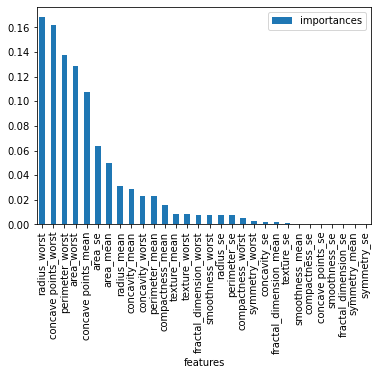

In [18]:
from matplotlib import pyplot as plt

df_importance = pd.DataFrame({
    'features': X_train.columns,
    'importances': model_1.feature_importances_}).sort_values('importances', ascending=False)

plt.figure(figsize=(16, 16))
df_importance.plot.bar(x='features', y='importances')

In [19]:
df_importance

,features,importances
20,radius_worst,0.168102
27,concave points_worst,0.161871
22,perimeter_worst,0.137721
23,area_worst,0.128259
7,concave points_mean,0.107091
13,area_se,0.064051
3,area_mean,0.050260
0,radius_mean,0.030897
6,concavity_mean,0.028960
26,concavity_worst,0.022982


A partir do ranking de importância das variáveis para o diagnóstico, podemos orientar quais medidas manter e quais podemos desconsiderar. Podemos

In [20]:
print('\nVariáveis a serem excluídas de acordo com o cenário\n')
cenario_restrito = df_importance.loc[df_importance['importances'] <= 0.07, 'features']
print('Cenário restrito:\n',cenario_restrito)
cenario_intermediario = df_importance.loc[df_importance['importances'] <= 0.01, 'features']
print('Cenário intermediário:\n', cenario_intermediario)
cenario_flexivel = df_importance.loc[df_importance['importances'] <= 0.001, 'features']
print('Cenário flexível:\n', cenario_flexivel)


Variáveis a serem excluídas de acordo com o cenário

Cenário restrito:
 13                    area_se
3                   area_mean
0                 radius_mean
6              concavity_mean
26            concavity_worst
2              perimeter_mean
5            compactness_mean
1                texture_mean
21              texture_worst
29    fractal_dimension_worst
24           smoothness_worst
10                  radius_se
12               perimeter_se
25          compactness_worst
28             symmetry_worst
16               concavity_se
9      fractal_dimension_mean
11                 texture_se
4             smoothness_mean
15             compactness_se
17          concave points_se
14              smoothness_se
19       fractal_dimension_se
8               symmetry_mean
18                symmetry_se
Name: features, dtype: object
Cenário intermediário:
 1                texture_mean
21              texture_worst
29    fractal_dimension_worst
24           smoothness_worst
10 

## Exercício 2

A partir do dataset abaixo, utilize um modelo **RandomForeset** para prever, a partir das variáveis de entrada, a probabilidade do individuo receber mais de $50k por ano. Defina um ponto de corte na probabilidade em que, sempre que a probabilidade for maior que o corte, a classe será predita como 1.  

Uma descrição do dataset pode ser encontrada [aqui](http://www.cs.toronto.edu/~delve/data/adult/adultDetail.html).  

Ao final do exercício, reporte:  

1 - O tamanho da base utilizada para treino/validação e o tamanho da base utilizada para teste;  
2 - Um gráfico de barras com a importância de cada variável no precesso de predição;  
3 - A acurácia, precisão e recall de treino, validação e teste;  
4 - Uma comparação com o desempenho de uma árvore de decisão simples.  

**Importante**: lembre-se de fazer a divisão do conjunto de teste antes de iniciar o exercício!

In [21]:
import pandas as pd

In [22]:
adult_dataset = pd.read_csv('adult.csv')

print(adult_dataset.shape)
display(adult_dataset.head())

(48842, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


#### Separando treino e teste

In [23]:
# Split train and test sets
adult_train = adult_dataset.sample(frac=0.70,random_state=13)
adult_test = adult_dataset.drop(adult_train.index)
print(adult_train.shape, adult_test.shape)

(34189, 15) (14653, 15)


In [24]:
# Variáveis
adult_train.nunique()

age                   74
workclass              9
fnlwgt             22317
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         120
capital-loss          92
hours-per-week        94
native-country        42
income                 2
dtype: int64

In [25]:
# Features categóricas e numéricas
categ_features = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
num_features = ['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [26]:
# Visualizando a target
adult_train['income'].value_counts()

<=50K    25975
>50K      8214
Name: income, dtype: int64

In [27]:
# Tratando a target: string para int
adult_train['income'] = adult_train['income'].map({'<=50K':0, '>50K':1})

In [28]:
X = adult_train[categ_features + num_features]
y = adult_train['income']

print(X.shape, y.shape)

(34189, 12) (34189,)


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=12)

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(23932, 12) (23932,)
(10257, 12) (10257,)


#### Tratamento das features

In [30]:
from sklearn.preprocessing import OrdinalEncoder

pd.options.mode.chained_assignment = None

oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

oe.fit(X_train[categ_features])

X_train[categ_features] = oe.transform(X_train[categ_features])

X_valid[categ_features] = oe.transform(X_valid[categ_features])

X_train.head()

,workclass,marital-status,occupation,relationship,race,gender,native-country,age,educational-num,capital-gain,capital-loss,hours-per-week
19833,4.0,2.0,3.0,0.0,4.0,1.0,39.0,56,14,0,1977,44
16480,6.0,4.0,12.0,1.0,4.0,1.0,39.0,24,9,0,0,40
46300,4.0,4.0,12.0,3.0,4.0,0.0,39.0,19,9,0,0,30
910,4.0,4.0,7.0,3.0,4.0,1.0,39.0,38,9,0,0,40
5031,4.0,0.0,3.0,1.0,4.0,1.0,39.0,44,9,0,0,45


#### Modelo random forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier(n_estimators=200, max_depth=6, min_samples_leaf=15, random_state=12)

modelo.fit(X_train, y_train)

y_train_pred = modelo.predict(X_train)

y_valid_pred = modelo.predict(X_valid)

print(y_train_pred.shape, y_valid_pred.shape)

(23932,) (10257,)


In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc_train = accuracy_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred)
rec_train = recall_score(y_train, y_train_pred)

acc_valid = accuracy_score(y_valid, y_valid_pred)
prec_valid = precision_score(y_valid, y_valid_pred)
rec_valid = recall_score(y_valid, y_valid_pred)

print(f'Treino:\nAcc: {acc_train:.2f}, Precision: {prec_train:.2f}, Recall: {rec_train:.2f}')
print(f'Validação:\nAcc: {acc_valid:.2f}, Precision: {prec_valid:.2f}, Recall: {rec_valid:.2f}')

Treino:
Acc: 0.85, Precision: 0.80, Recall: 0.51
Validação:
Acc: 0.85, Precision: 0.81, Recall: 0.52


#### Gerando predict probabilísticos

In [33]:
# Os preditos do modelo são binários
y_train_pred

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [34]:
# O método predict_proba() retorna probabilidades de ser 0 ou 1
modelo.predict_proba(X_train)

array([[0.20873728, 0.79126272],
       [0.9707015 , 0.0292985 ],
       [0.98928783, 0.01071217],
       ...,
       [0.98934565, 0.01065435],
       [0.1958831 , 0.8041169 ],
       [0.38892411, 0.61107589]])

In [35]:
# Função para converter probabilidade em 0 ou 1 a partir de um ponto de corte

def get_prediction(y_pred_prob, corte):
    y_pred_prob = y_pred_prob.copy()
    mask = (y_pred_prob >= corte)
    y_pred_prob[mask] = 1
    y_pred_prob[~mask] = 0
    
    return y_pred_prob

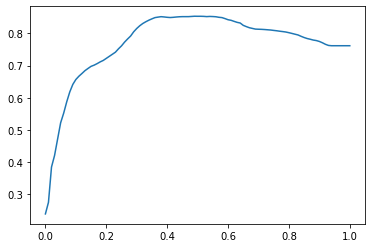

In [36]:
import numpy as np
from matplotlib import pyplot as plt

y_pred_train_proba = modelo.predict_proba(X_train)[:,1] # seleciona a probabilidade de ser 1

acuracias = []
cortes = []

for corte in np.linspace(0, 1, 101):

    acc_train = accuracy_score(y_train, get_prediction(y_pred_train_proba, corte=corte))
    
    acuracias.append(acc_train)
    cortes.append(corte)

plt.plot(cortes, acuracias)

In [37]:
acuracia_maxima = np.max(acuracias)

melhor_corte = cortes[acuracias.index(acuracia_maxima)]

print(f'O melhor ponto de corte é em {melhor_corte}')

O melhor ponto de corte é em 0.49


In [38]:
# Métricas 
y_train_pred = get_prediction(modelo.predict_proba(X_train)[:,1], corte=melhor_corte)

y_valid_pred = get_prediction(modelo.predict_proba(X_valid)[:,1], corte=melhor_corte)

print(y_train_pred.shape, y_valid_pred.shape)

acc_train = accuracy_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred)
rec_train = recall_score(y_train, y_train_pred)

acc_valid = accuracy_score(y_valid, y_valid_pred)
prec_valid = precision_score(y_valid, y_valid_pred)
rec_valid = recall_score(y_valid, y_valid_pred)

print(f'Treino:\nAcc: {acc_train:.4f}, Precision: {prec_train:.4f}, Recall: {rec_train:.4f}')
print(f'Validação:\nAcc: {acc_valid:.4f}, Precision: {prec_valid:.4f}, Recall: {rec_valid:.4f}')

(23932,) (10257,)
Treino:
Acc: 0.8537, Precision: 0.7955, Recall: 0.5189
Validação:
Acc: 0.8541, Precision: 0.8071, Recall: 0.5324


### Teste

In [39]:
adult_test.head(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


In [40]:
# Tratando a target: string para int
adult_test['income'] = adult_test['income'].map({'<=50K':0, '>50K':1})

In [41]:
# 
y_test = adult_test['income'] # target do teste
X_test = adult_test[categ_features + num_features]
X_test[categ_features] = oe.transform(X_test[categ_features])
print(X_test.shape, y_test.shape)

(14653, 12) (14653,)


In [42]:
X_test.head(2)

,workclass,marital-status,occupation,relationship,race,gender,native-country,age,educational-num,capital-gain,capital-loss,hours-per-week
0,4.0,4.0,7.0,3.0,2.0,1.0,39.0,25,7,0,0,40
1,4.0,2.0,5.0,0.0,4.0,1.0,39.0,38,9,0,0,50


In [43]:
y_test_pred = modelo.predict(X_test)

acc_test = accuracy_score(y_test, y_test_pred)
prec_test = precision_score(y_test, y_test_pred)
rec_test = recall_score(y_test, y_test_pred)

print(f'Teste:\nAcc: {acc_test:.4f}, Precision: {prec_test:.4f}, Recall: {rec_test:.4f}')

Teste:
Acc: 0.8607, Precision: 0.8177, Recall: 0.5307


### Respostas

Ao final do exercício, reporte:  

1 - O tamanho da base utilizada para treino/validação e o tamanho da base utilizada para teste;  
2 - Um gráfico de barras com a importância de cada variável no precesso de predição;  
3 - A acurácia, precisão e recall de treino, validação e teste;  
4 - Uma comparação com o desempenho de uma árvore de decisão simples.  


In [44]:
print('Tamanho das bases:')
print(f'Treino = {X_train.shape[0]}, validação = {X_valid.shape[0]} e teste = {X_test.shape[0]}')

Tamanho das bases:
Treino = 23932, validação = 10257 e teste = 14653


<Figure size 1152x1152 with 0 Axes>

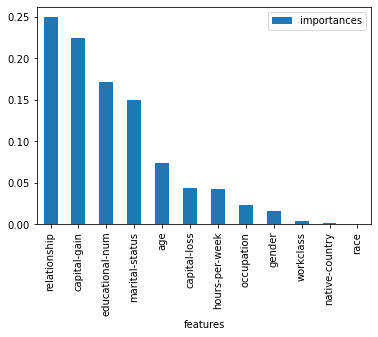

In [45]:
from matplotlib import pyplot as plt

df_importance = pd.DataFrame({
    'features': X_train.columns,
    'importances': modelo.feature_importances_}).sort_values('importances', ascending=False)

plt.figure(figsize=(16, 16))
df_importance.plot.bar(x='features', y='importances');

In [46]:
print(f'Treino:\nAcc: {acc_train:.4f}, Precision: {prec_train:.4f}, Recall: {rec_train:.4f}')
print(f'Validação:\nAcc: {acc_valid:.4f}, Precision: {prec_valid:.4f}, Recall: {rec_valid:.4f}')
print(f'Teste:\nAcc: {acc_test:.4f}, Precision: {prec_test:.4f}, Recall: {rec_test:.4f}')

Treino:
Acc: 0.8537, Precision: 0.7955, Recall: 0.5189
Validação:
Acc: 0.8541, Precision: 0.8071, Recall: 0.5324
Teste:
Acc: 0.8607, Precision: 0.8177, Recall: 0.5307


#### Árvore de decisão simples

In [47]:
from sklearn.tree import DecisionTreeClassifier

arvore = DecisionTreeClassifier(max_depth=4, min_samples_leaf=15, random_state=23)

arvore.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=15, random_state=23)

In [48]:
y_train_pred_arvore = arvore.predict(X_train)

y_valid_pred_arvore = arvore.predict(X_valid)

In [49]:
acc_train = accuracy_score(y_train, y_train_pred_arvore)
prec_train = precision_score(y_train, y_train_pred_arvore)
rec_train = recall_score(y_train, y_train_pred_arvore)

acc_valid = accuracy_score(y_valid, y_valid_pred_arvore)
prec_valid = precision_score(y_valid, y_valid_pred_arvore)
rec_valid = recall_score(y_valid, y_valid_pred_arvore)

print(f'Treino:\nAcc: {acc_train:.2f}, Precision: {prec_train:.2f}, Recall: {rec_train:.2f}')
print(f'Validação:\nAcc: {acc_valid:.2f}, Precision: {prec_valid:.2f}, Recall: {rec_valid:.2f}')

Treino:
Acc: 0.85, Precision: 0.77, Recall: 0.50
Validação:
Acc: 0.84, Precision: 0.78, Recall: 0.50


O desempenho do modelo random forest é ligeiramente superior ao de uma árvore simples